In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel(r'C:\Users\Sairam\Downloads\data.xlsx')

In [4]:
df.head()

,Invoice No,Customer Account Code,Week Number,Product Super Category,Sales 2017,Sales 2016,Channel,Order Type,Store Type
0,1-10000,X110593,23,Catering,49.05,NaN,Foodservice Collect,Till,Work Place
1,1-10001,X112731,23,Catering,50.51,NaN,Retail Collect,Till,Independent Grocer
2,1-10001,X112731,23,Chill & Frozen,68.66,NaN,Retail Collect,Till,Independent Grocer
3,1-10001,X112731,23,Electrical&Seasonal,8.90,NaN,Retail Collect,Till,Independent Grocer
4,1-10001,X112731,23,Grocery,12.35,NaN,Retail Collect,Till,Independent Grocer


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181427 entries, 0 to 181426
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Invoice No              181427 non-null  object 
 1   Customer Account Code   181427 non-null  object 
 2   Week Number             181427 non-null  int64  
 3   Product Super Category  181427 non-null  object 
 4   Sales 2017              89751 non-null   float64
 5   Sales 2016              91676 non-null   float64
 6   Channel                 181427 non-null  object 
 7   Order Type              181427 non-null  object 
 8   Store Type              181427 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 12.5+ MB


In [6]:
df.isnull().sum()

Invoice No                    0
Customer Account Code         0
Week Number                   0
Product Super Category        0
Sales 2017                91676
Sales 2016                89751
Channel                       0
Order Type                    0
Store Type                    0
dtype: int64

In [7]:
(100*df.isna().sum()/len(df)).round(2).sort_values(ascending=False)

Sales 2017                50.53
Sales 2016                49.47
Invoice No                 0.00
Customer Account Code      0.00
Week Number                0.00
Product Super Category     0.00
Channel                    0.00
Order Type                 0.00
Store Type                 0.00
dtype: float64

In [8]:
df['Week Number'].value_counts()

22    48363
20    47731
21    46206
23    39127
Name: Week Number, dtype: int64

In [9]:
df['Product Super Category'].value_counts()

Catering               50725
Chill & Frozen         38628
Impulse                34713
Grocery                25153
Electrical&Seasonal    15667
Liquor                 12271
Tobacco                 4007
Other                    230
Missing Entry             33
Name: Product Super Category, dtype: int64

In [10]:
df['Channel'].value_counts()

Foodservice Collect      135088
Retail Collect            28486
Other Collect             14825
Foodservice Delivered      2420
Retail Delivered            534
Export                       52
Missing Entry                14
Bulk                          8
Name: Channel, dtype: int64

In [11]:
df['Order Type'].value_counts()    

Till                      162438
Delivered                  14594
Online Delivered            2373
Online Click & Collect      2022
Name: Order Type, dtype: int64

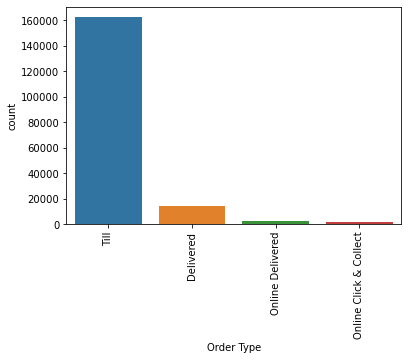

In [12]:
sns.countplot( x ='Order Type', data=df)

plt.xticks(rotation=90)
plt.show()

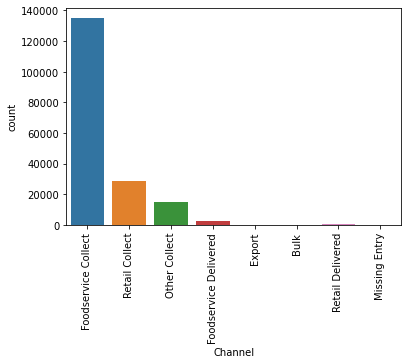

In [13]:
sns.countplot(x='Channel',data=df)
plt.xticks(rotation=90)
plt.show()

#sns.countplot(x='Product Super Category',dat=df)
plt.xticks(rotation=90)
plt.show()

<bound method Axes.bar of <AxesSubplot:>>

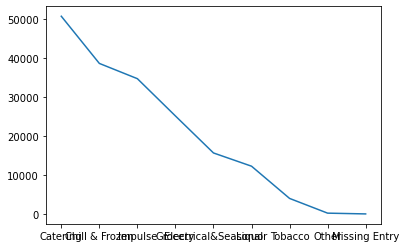

In [14]:
df['Product Super Category'].value_counts().plot().bar

In [15]:
df.columns

Index(['Invoice No', 'Customer Account Code', 'Week Number',
       'Product Super Category', 'Sales 2017', 'Sales 2016', 'Channel',
       'Order Type', 'Store Type'],
      dtype='object')

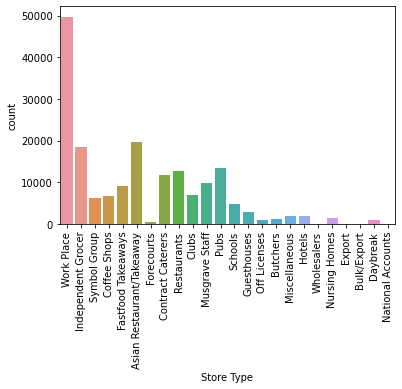

In [16]:
sns.countplot( x ='Store Type', data=df)

plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Sales 2017', ylabel='Density'>

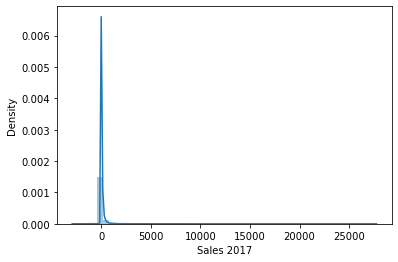

In [17]:
sns.distplot(df['Sales 2017'])

<AxesSubplot:xlabel='Sales 2016', ylabel='Density'>

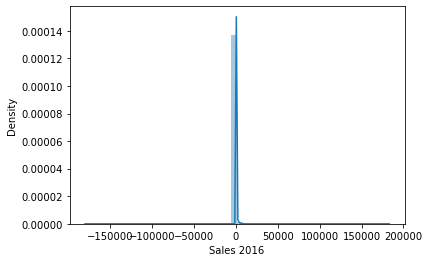

In [18]:
sns.distplot(df['Sales 2016'])

<bound method Axes.scatter of <AxesSubplot:>>

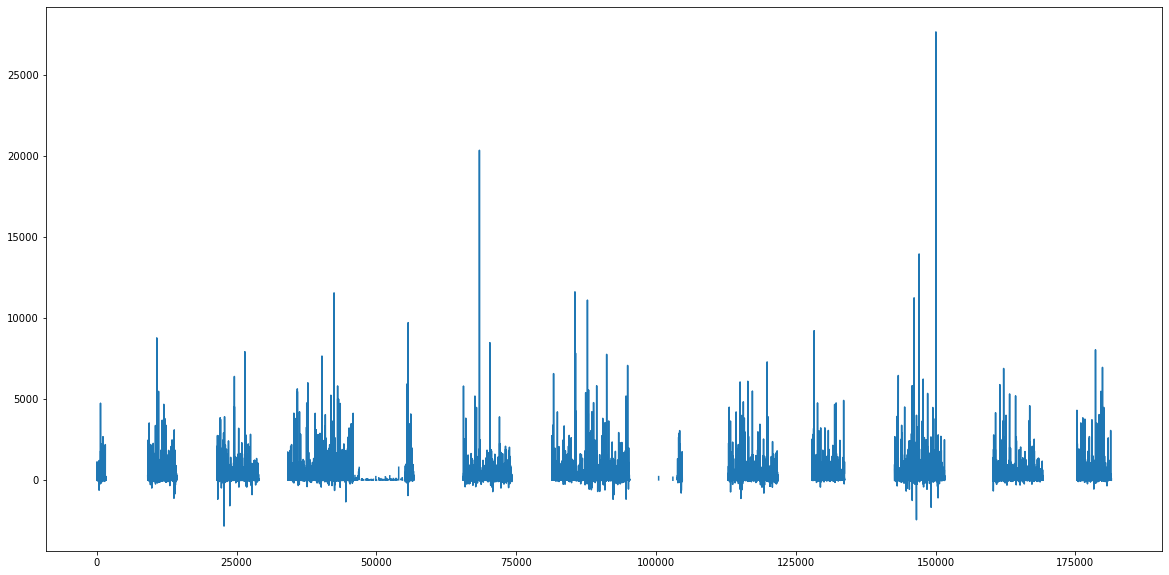

In [19]:
plt.figure(figsize=(20,10))
df['Sales 2017'].plot().scatter

<bound method Axes.scatter of <AxesSubplot:>>

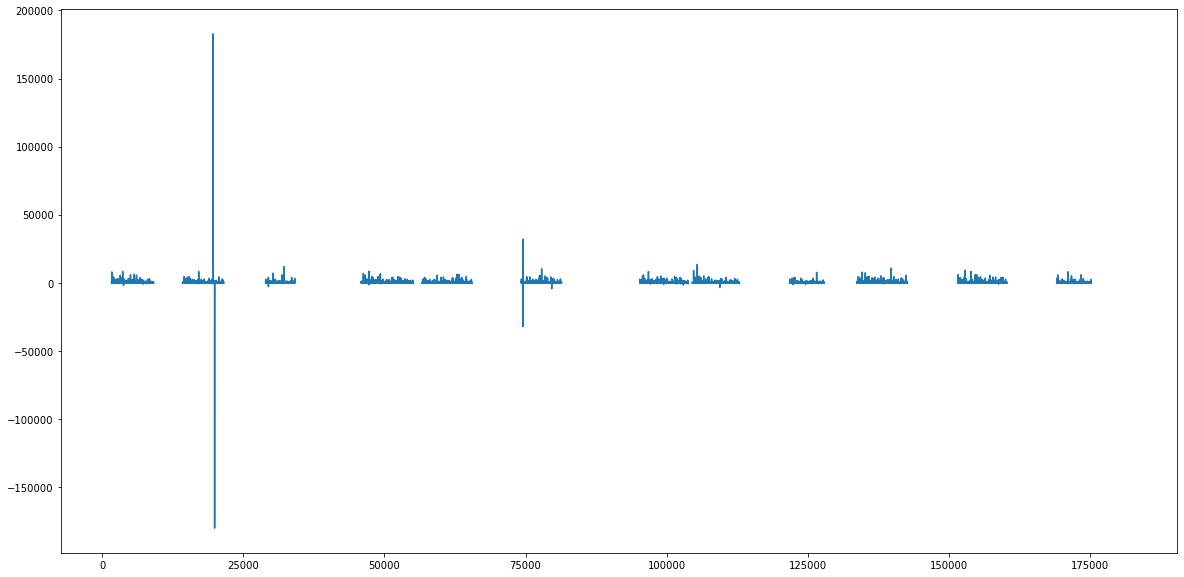

In [20]:
plt.figure(figsize=(20,10))
df['Sales 2016'].plot().scatter

<bound method Axes.scatter of <AxesSubplot:>>

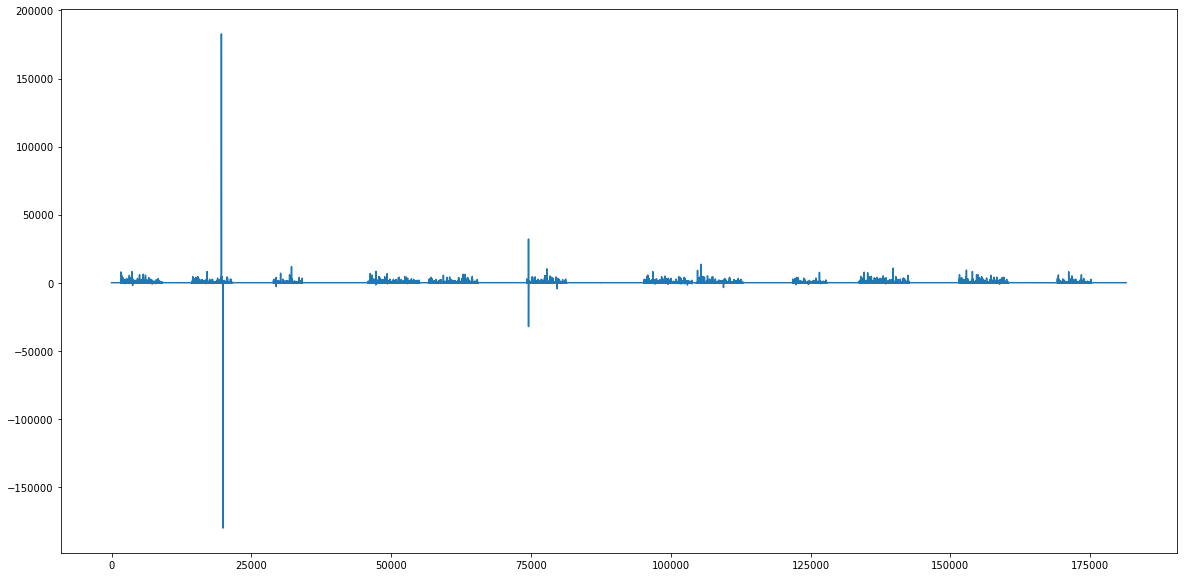

In [21]:
plt.figure(figsize=(20,10))
df['Sales 2016'].fillna(df['Sales 2016'].mean()).plot().scatter

<bound method Axes.scatter of <AxesSubplot:>>

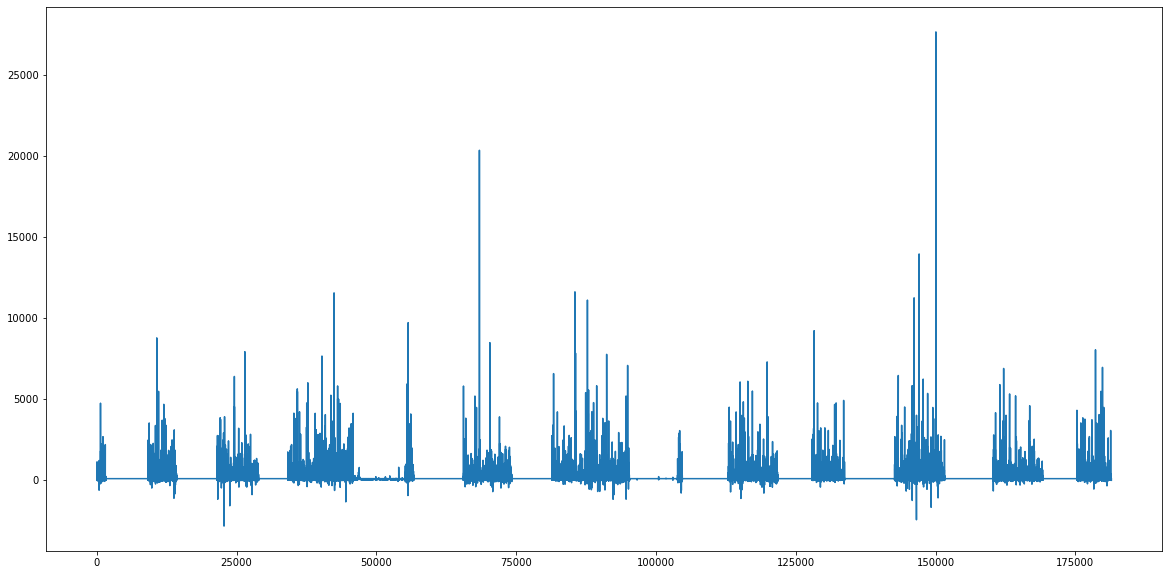

In [22]:
plt.figure(figsize=(20,10))
df['Sales 2017'].fillna(df['Sales 2017'].mean()).plot().scatter

<bound method Axes.scatter of <AxesSubplot:>>

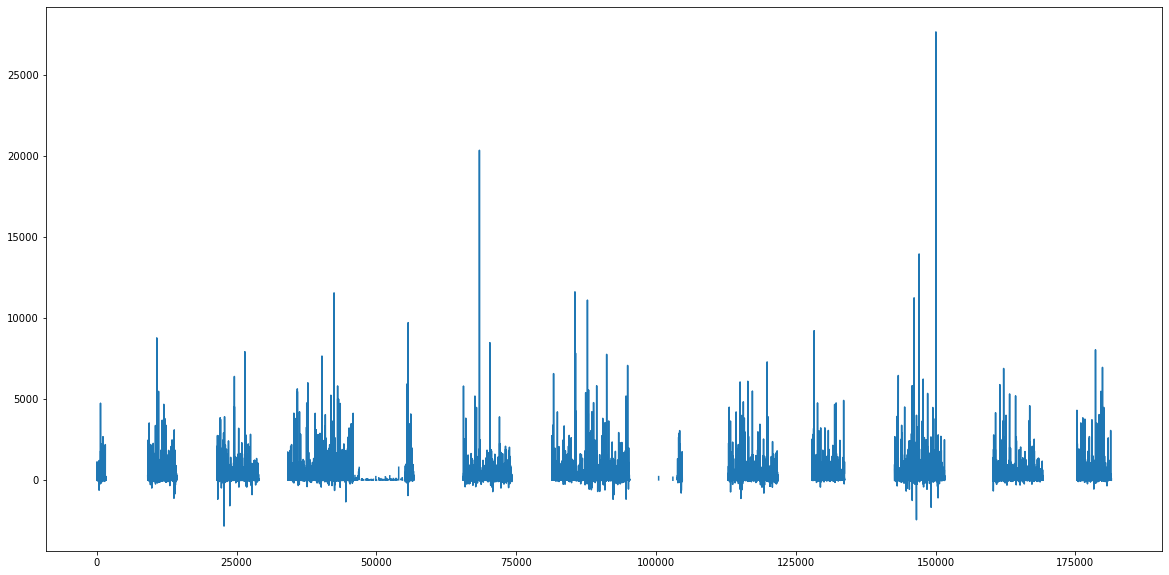

In [23]:
plt.figure(figsize=(20,10))
df['Sales 2017'].fillna(df['Sales 2017'].mode()).plot().scatter

In [24]:
print(df['Sales 2017'].mode())
print(df['Sales 2017'].median())
print(df['Sales 2017'].mean())

0    0.0
dtype: float64
35.09
100.67367026552218


In [25]:
print(df['Sales 2016'].mode())
print(df['Sales 2016'].median())
print(df['Sales 2016'].mean())

0    0.0
dtype: float64
34.790000000000006
100.33256053929841


In [26]:
df['Sales 2016'] = df['Sales 2016'].fillna(df['Sales 2016'].median())

In [27]:
df['Sales 2017'] = df['Sales 2017'].fillna(df['Sales 2017'].median())

In [28]:
df.isnull().sum()

Invoice No                0
Customer Account Code     0
Week Number               0
Product Super Category    0
Sales 2017                0
Sales 2016                0
Channel                   0
Order Type                0
Store Type                0
dtype: int64

df['Week Number'].plot().bar

### Checking Outliers

<AxesSubplot:xlabel='Sales 2017'>

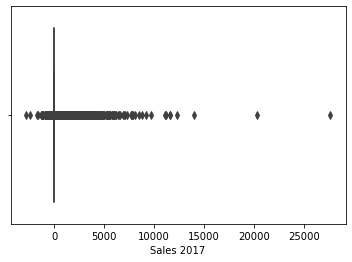

In [29]:
sns.boxplot(df['Sales 2017'])

<AxesSubplot:xlabel='Sales 2016'>

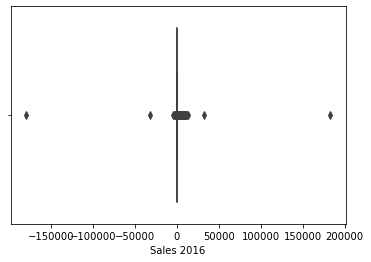

In [30]:
sns.boxplot(df['Sales 2016'])

In [31]:
print(df['Sales 2017'].max(),";",df['Sales 2017'].min())

27653.36 ; -2825.13


In [32]:
print(df['Sales 2016'].max(),";",df['Sales 2016'].min())

182799.94999999998 ; -180117.0


In [33]:
Q1 = df['Sales 2016'].quantile(0.25)
Q3 = df['Sales 2016'].quantile(0.75)
IQR = Q3 - Q1
LW=(Q1 - 1.5 * IQR)
UW=(Q3 + 1.5 * IQR)
UW

37.49000000000001

In [34]:
Q1 = df['Sales 2017'].quantile(0.25)
Q3 = df['Sales 2017'].quantile(0.75)
IQR = Q3 - Q1
LW=(Q1 - 1.5 * IQR)
UW=(Q3 + 1.5 * IQR)
UW

35.09

In [35]:
num_cols = df.describe().columns

In [36]:
num_cols = list(num_cols)

In [37]:
df_cols = list(df.columns) 

In [38]:
cat_cols = [cols for cols in df_cols if cols not in num_cols]

In [39]:
cat_cols

['Invoice No',
 'Customer Account Code',
 'Product Super Category',
 'Channel',
 'Order Type',
 'Store Type']

## Exploratory Data Analysis

In [40]:
df.columns

Index(['Invoice No', 'Customer Account Code', 'Week Number',
       'Product Super Category', 'Sales 2017', 'Sales 2016', 'Channel',
       'Order Type', 'Store Type'],
      dtype='object')

<AxesSubplot:xlabel='Product Super Category'>

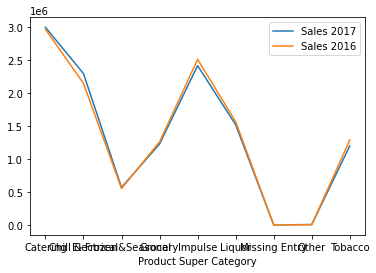

In [41]:
df.groupby(by=df['Product Super Category'])['Sales 2017','Sales 2016'].sum().plot()

In [42]:
sales_sum = df.groupby(by=df['Product Super Category'])['Sales 2017','Sales 2016'].sum()

<AxesSubplot:>

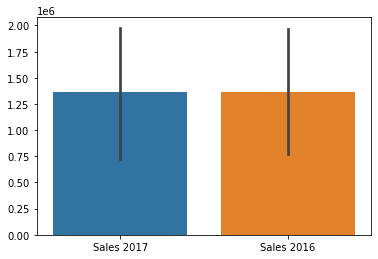

In [43]:
sns.barplot(data=sales_sum)

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [44]:
def cat_var(cat):
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x = cat, y = 'Sales 2017',data=df)
    plt.axhline(0.081, color='red',linestyle='--')
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.00%}', (x + width/2, y + height*1), ha='center')

        
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    
    plt.show()

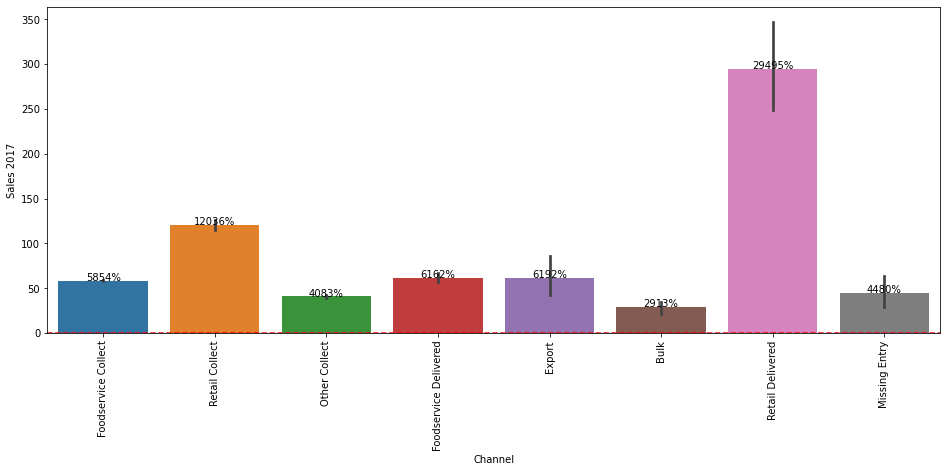

In [45]:
# Analysing col NAME_EDUCATION_TYPE
cat_var(df.Channel)

infernces

    1. Retail Delivered channel did more sales in 2017 where as bulk orders are least
    

In [46]:
def cat_vars(cat):
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x = cat, y = 'Sales 2016',data=df)
    plt.axhline(0.081, color='red',linestyle='--')
    
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.00%}', (x + width/2, y + height*1), ha='center')

        
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    
    plt.show()

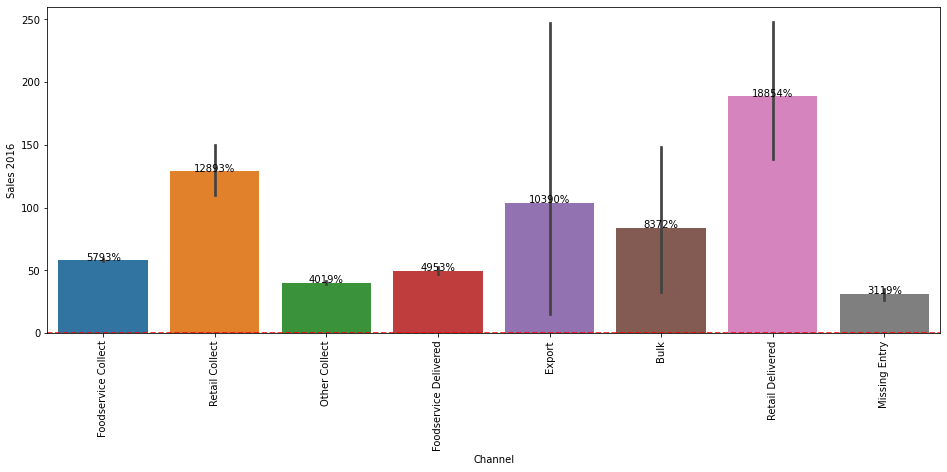

In [47]:
# Analysing col NAME_EDUCATION_TYPE
cat_vars(df.Channel)

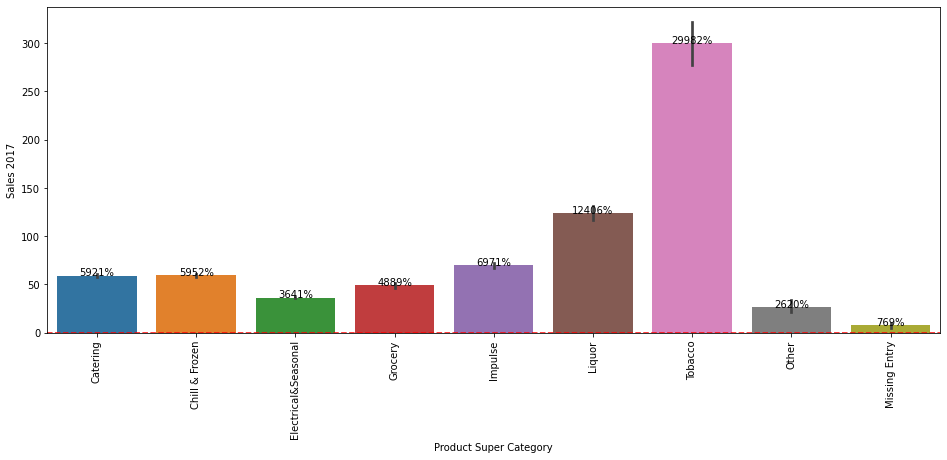

In [48]:
cat_var(df['Product Super Category'])

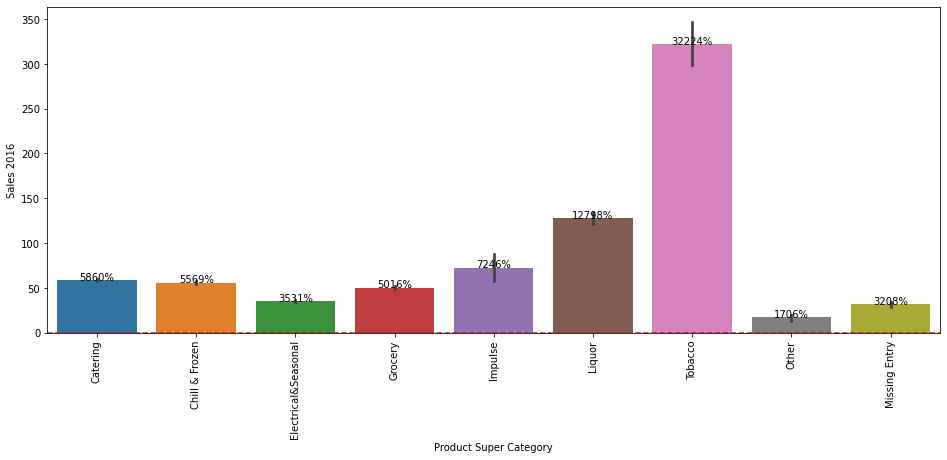

In [49]:
cat_vars(df['Product Super Category'])

In [50]:
df.columns

Index(['Invoice No', 'Customer Account Code', 'Week Number',
       'Product Super Category', 'Sales 2017', 'Sales 2016', 'Channel',
       'Order Type', 'Store Type'],
      dtype='object')

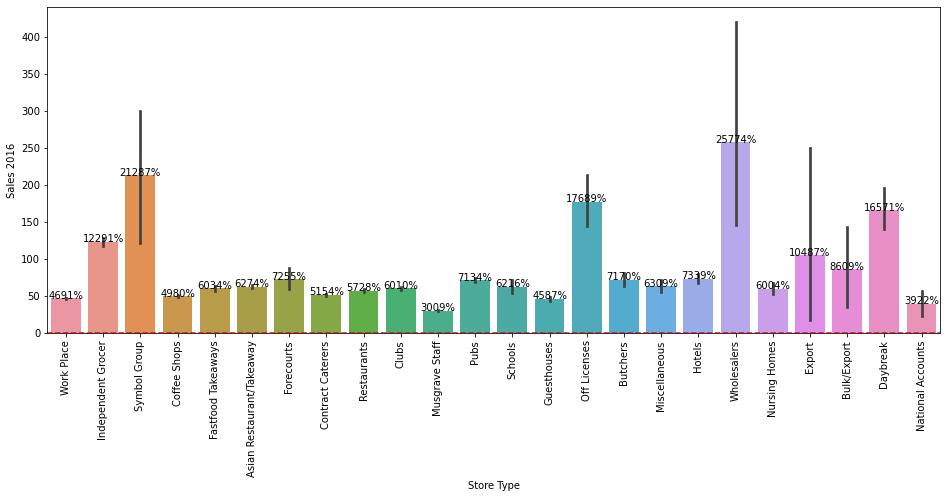

In [51]:
cat_vars(df['Store Type'])

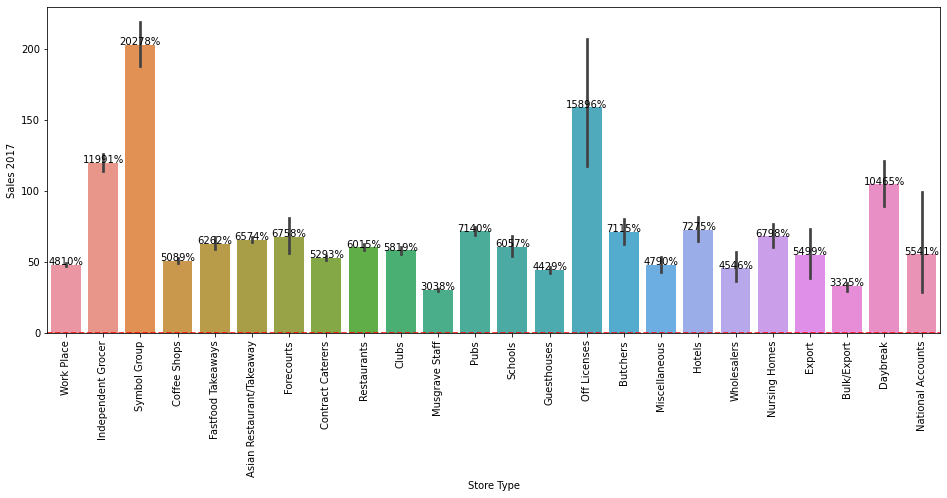

In [52]:
cat_var(df['Store Type'])

In [53]:
df['Sales 2016'].value_counts()

34.79     89752
0.00        667
4.55        281
4.75        248
9.99        201
          ...  
42.52         1
521.46        1
319.58        1
161.91        1
86.90         1
Name: Sales 2016, Length: 32659, dtype: int64

In [54]:
df['Sales 2017'].value_counts()

35.09     91681
0.00        708
4.55        296
22.69       292
9.99        233
          ...  
83.99         1
258.64        1
304.92        1
272.50        1
139.29        1
Name: Sales 2017, Length: 32361, dtype: int64

<Figure size 1152x864 with 0 Axes>

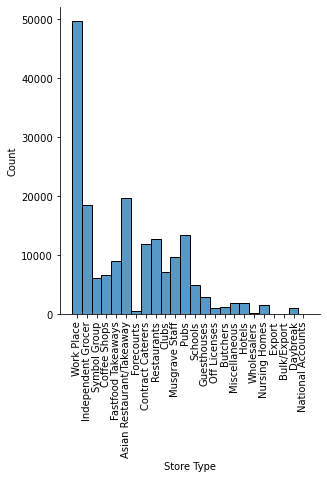

In [55]:
plt.figure(figsize=(16,12))
sns.displot(df['Store Type'])
plt.xticks(rotation=90)
plt.show()

<Figure size 1152x864 with 0 Axes>

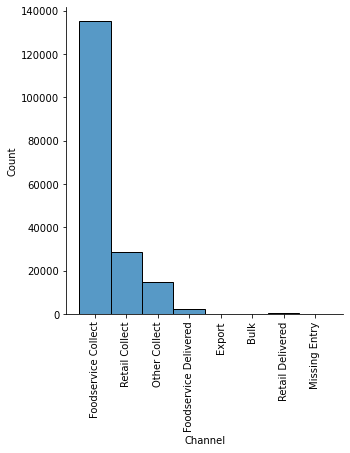

In [56]:
plt.figure(figsize=(16,12))
sns.displot(df['Channel'])
plt.xticks(rotation=90)
plt.show()

<Figure size 1152x864 with 0 Axes>

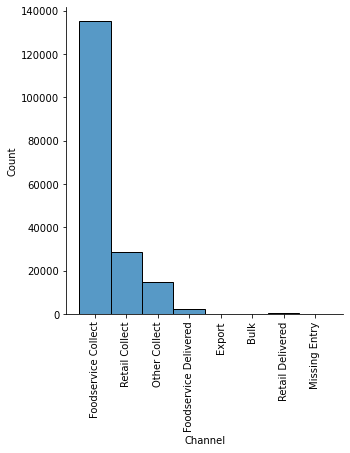

In [57]:
plt.figure(figsize=(16,12))
sns.displot(df['Channel'])
plt.xticks(rotation=90)
plt.show()

## Bi Variate Analysis

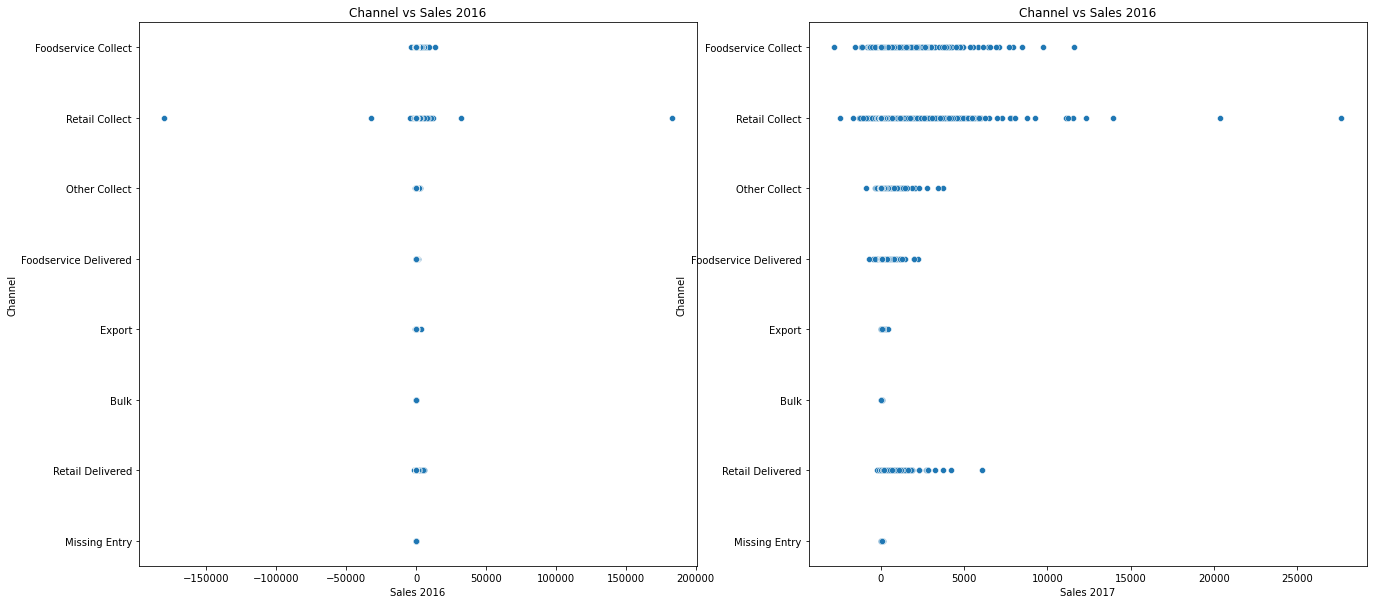

In [58]:
plt.figure(figsize=(22,10))
plt.subplot(121)
sns.scatterplot(x='Sales 2016',y='Channel',data=df)
plt.title('Channel vs Sales 2016')

plt.subplot(122)
sns.scatterplot(x='Sales 2017',y='Channel',data=df)
plt.title('Channel vs Sales 2016')
plt.show()

In [59]:
df.columns

Index(['Invoice No', 'Customer Account Code', 'Week Number',
       'Product Super Category', 'Sales 2017', 'Sales 2016', 'Channel',
       'Order Type', 'Store Type'],
      dtype='object')

In [60]:
def bi_var(base, vari, legend_pos_x, legend_pos_y):
    sns.set_style("whitegrid")
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x = base, y = 'Sales 2016',hue=vari,data=df, ci = None)
    plt.axhline(0.081, color='red',linestyle='--')
    
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    ax.legend(loc='center left', bbox_to_anchor=(legend_pos_x, legend_pos_y), ncol=1).set_title(vari)
    plot_title = f" {base} and {vari}"
    ax.set_title(plot_title, fontsize=20)
    
    
    plt.show()

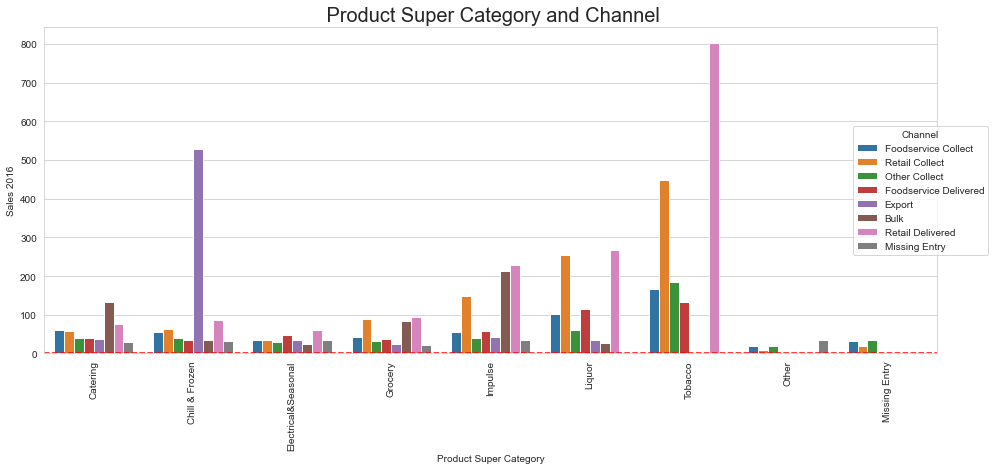

In [61]:
bi_var('Product Super Category','Channel', 0.90, 0.50 )

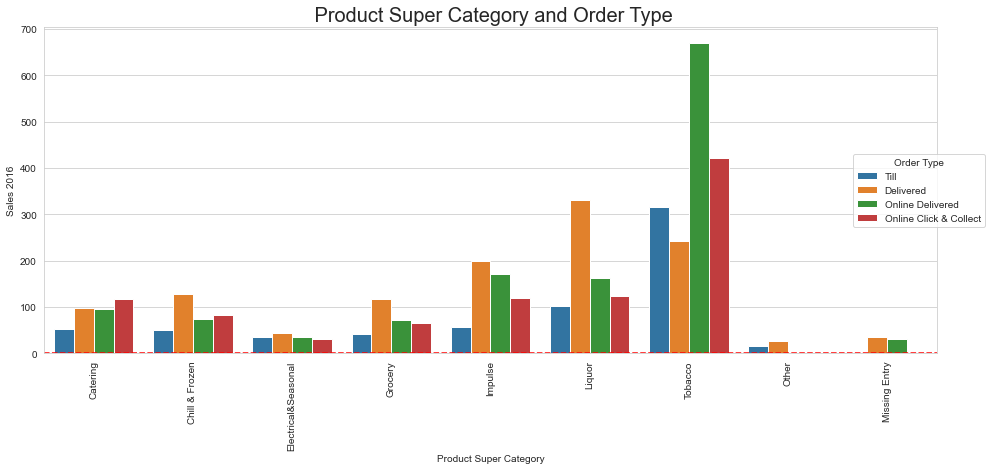

In [62]:
bi_var('Product Super Category','Order Type', 0.90, 0.50 )

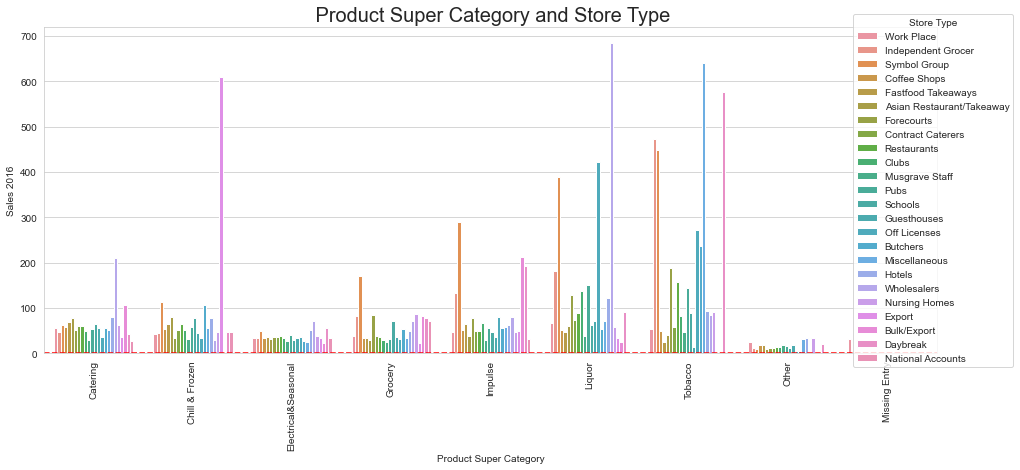

In [63]:
bi_var('Product Super Category','Store Type', 0.90, 0.50 )

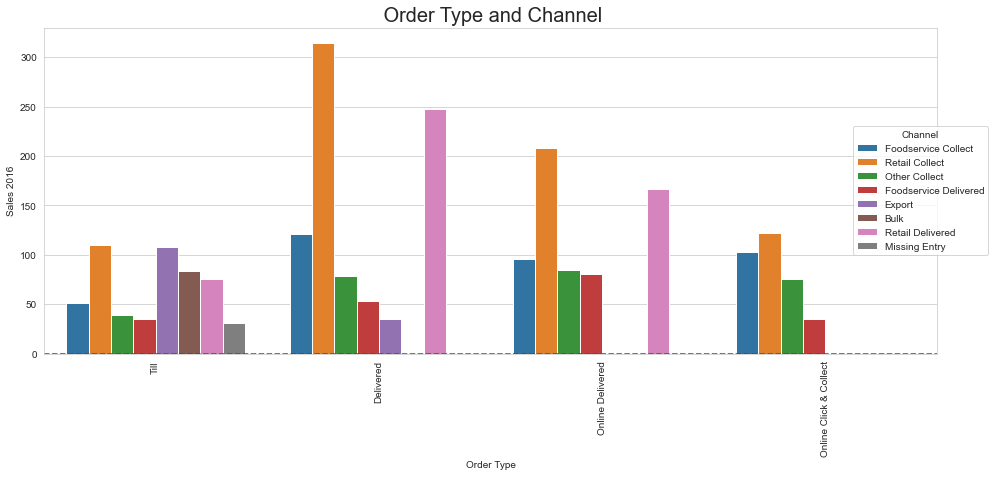

In [64]:
bi_var('Order Type','Channel', 0.90, 0.50 )

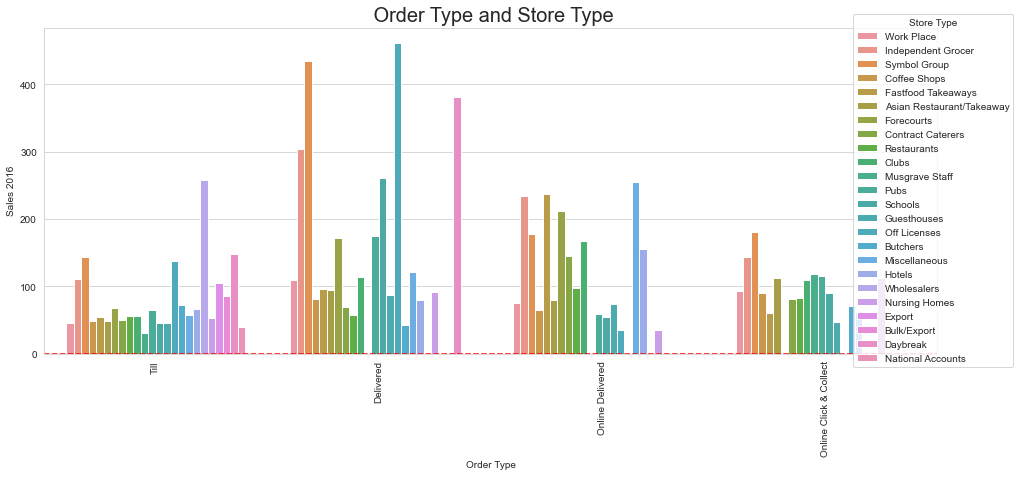

In [65]:
bi_var('Order Type','Store Type', 0.90, 0.50 )

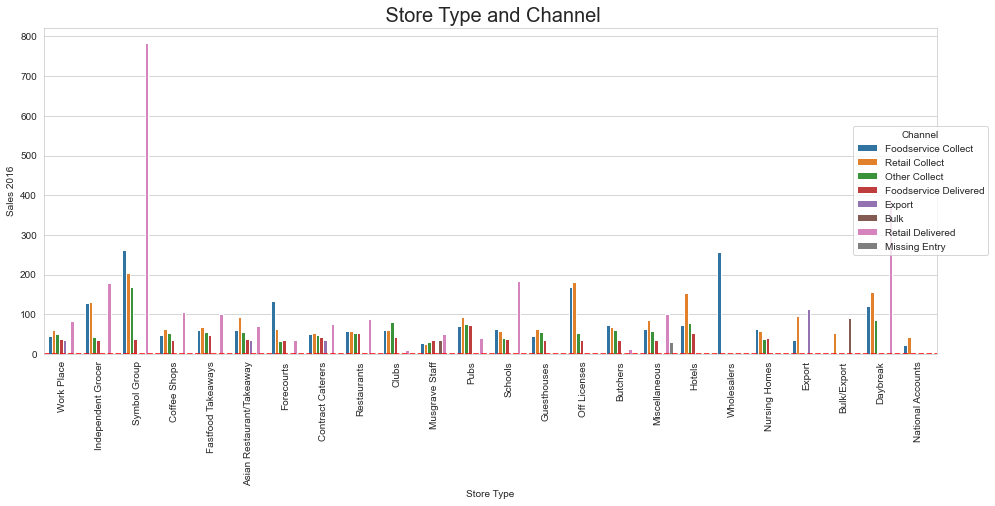

In [66]:
bi_var('Store Type','Channel', 0.90, 0.50 )

In [67]:
def bi_vars(base, vari, legend_pos_x, legend_pos_y):
    sns.set_style("whitegrid")
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x = base, y = 'Sales 2017',hue=vari,data=df, ci = None)
    plt.axhline(0.081, color='red',linestyle='--')
    
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    ax.legend(loc='center left', bbox_to_anchor=(legend_pos_x, legend_pos_y), ncol=1).set_title(vari)
    plot_title = f" {base} and {vari}"
    ax.set_title(plot_title, fontsize=20)
    
    
    plt.show()

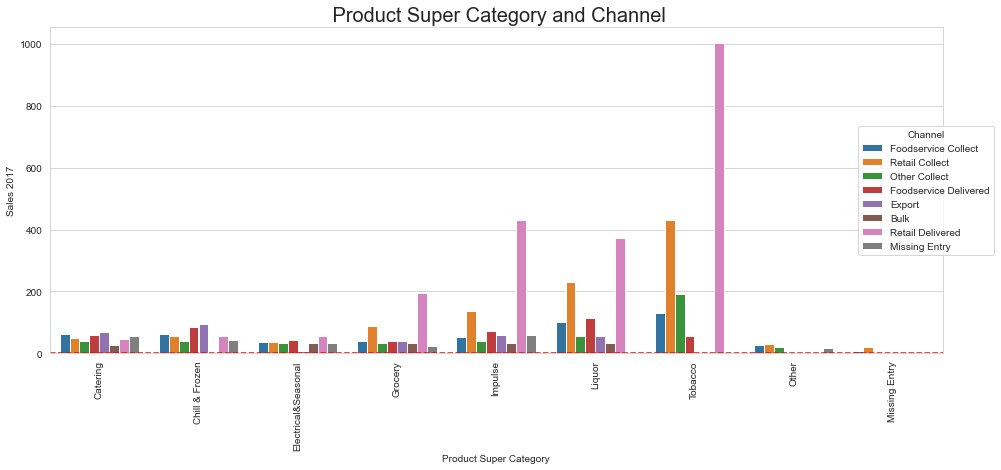

In [68]:
bi_vars('Product Super Category','Channel', 0.90, 0.50 )

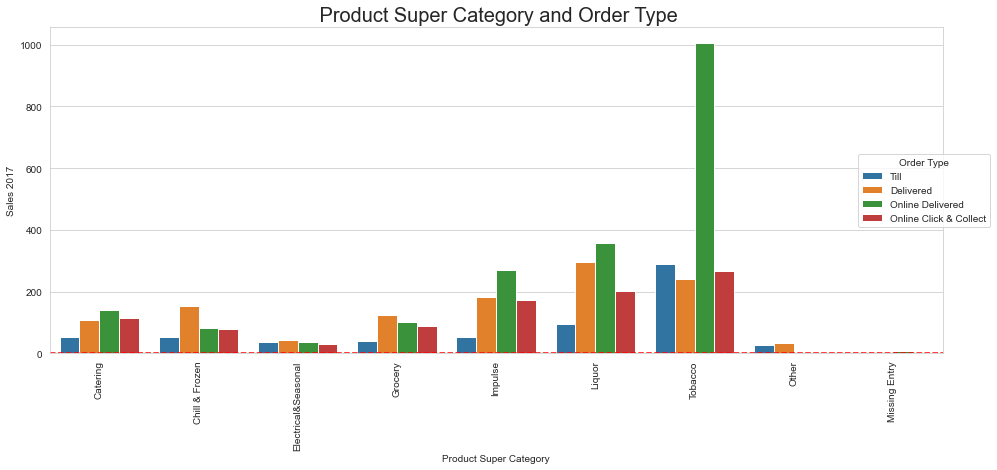

In [69]:
bi_vars('Product Super Category','Order Type', 0.90, 0.50 )

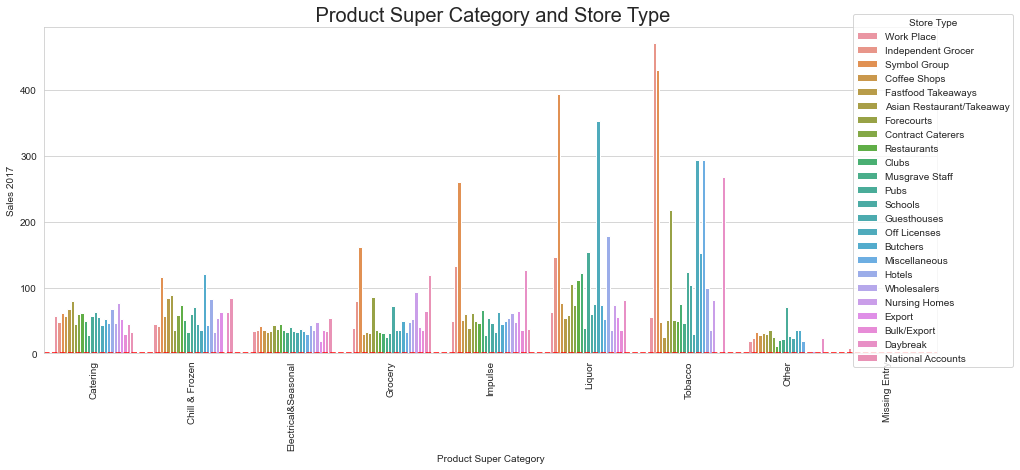

In [70]:
bi_vars('Product Super Category','Store Type', 0.90, 0.50 )

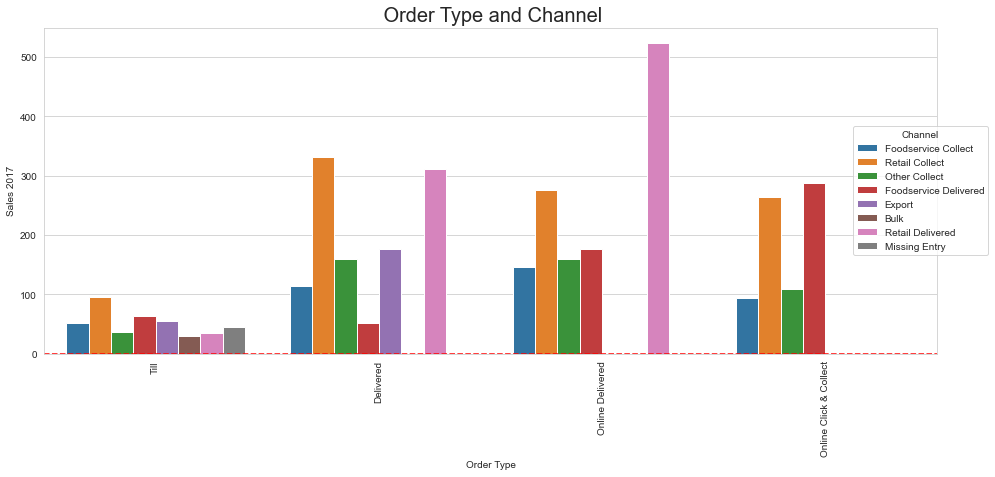

In [72]:
bi_vars('Order Type','Channel', 0.90, 0.50 )

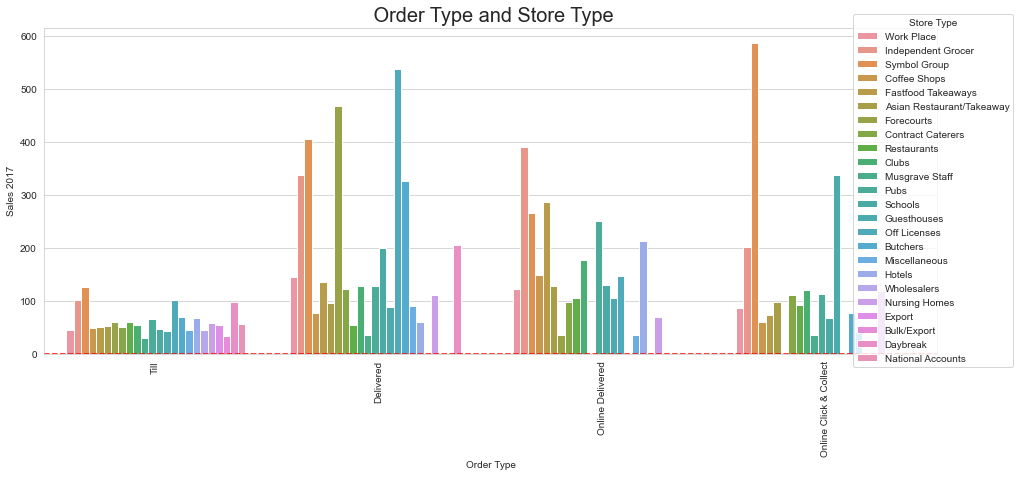

In [75]:
bi_vars('Order Type','Store Type', 0.90, 0.50 )

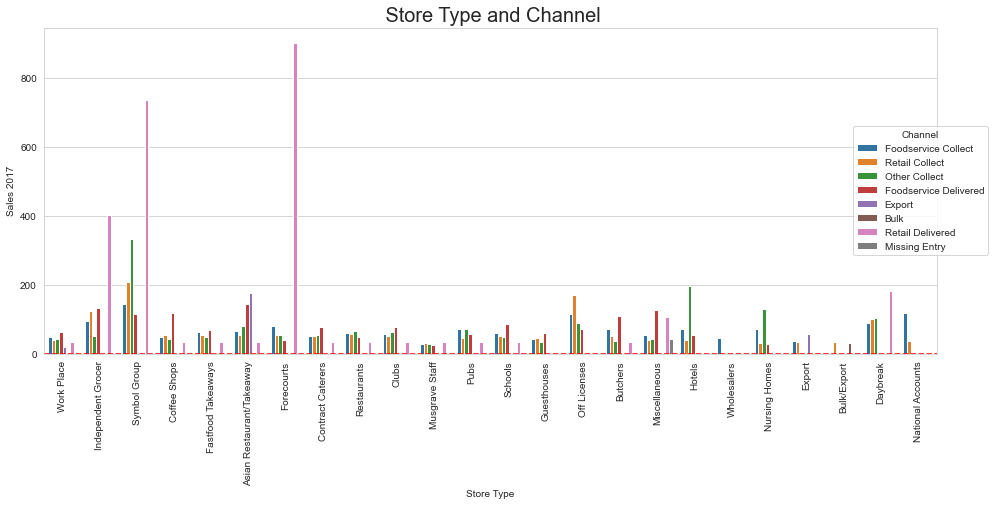

In [76]:
bi_vars('Store Type','Channel', 0.90, 0.50 )